## ATAC analysis

### Label transfer with Seurat 

01.2022

only multiome samples

## in a rush so using labels predicted previously in all-samples analysis

In [1]:
import numpy as np
import scanpy as sc 
import pandas as pd
import anndata
sc.settings.figdir = '/home/jovyan/notebooks/Vento_Lab/MFI_spatial/MFI_snATAC-seq/MFI_snATAC-seq_202111/figures/'

In [2]:
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [4]:
import rpy2.rinterface_lib.callbacks
import logging

In [5]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [6]:
import anndata2ri # needs 'pip install anndata2ri'
anndata2ri.activate()

In [7]:
%load_ext rpy2.ipython

In [12]:
# Define variables
cellatac_outdir = '/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/all_cells_analysis/results200k_sampleB/'
outdir = '/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/multiome_ATAC_samples_analysis/all_cells_analysis/downstream_analysis/'
experiment_prefix = 'multiome_only_MFI_prelim_all_cells'


In [13]:
%%R

sessionInfo()

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.0.4


In [9]:
%%R

.libPaths()

[1] "/home/jovyan/R/x86_64-pc-linux-gnu-library/4.0"
[2] "/usr/local/lib/R/site-library"                 
[3] "/usr/lib/R/site-library"                       
[4] "/usr/lib/R/library"                            


In [10]:
%%R

install.packages("https://cran.r-project.org/src/contrib/Matrix_1.3-4.tar.gz", repos=NULL)

**Save the predicted annotations to the gene activity anndata object for ATAC**

In [14]:
gene_data = sc.read_h5ad(outdir + experiment_prefix + "_ATAC.geneScores.h5ad")
gene_data

AnnData object with n_obs × n_vars = 52798 × 8936
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology'
    var: 'gene_id'
    uns: 'neighbors', 'umap'
    obsm: 'X_cistopic_50', 'X_umap'
    obsp: 'connectivities', 'distances'

In [15]:
gene_data.obs

,cellatac_clusters,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,cellatac_code,sample,donor,age,tissue,technology
09-AAACAGCCACAATGTT-1,3,1110,7.013016,1110.0,7.013016,4.504505,9.009009,18.018018,45.045045,09,Pla_Camb10714918_and_40110_Pla_Camb10687914,P14,8_PCW,decidua_basalis_and_myometrium,10X_multiome
09-AAACAGCCACTCGCTC-1,1,2695,7.899524,2695.0,7.899525,1.855288,3.710575,7.421150,18.552876,09,Pla_Camb10714918_and_40110_Pla_Camb10687914,P14,8_PCW,decidua_basalis_and_myometrium,10X_multiome
09-AAACATGCAACCCTCC-1,12,558,6.326149,558.0,6.326149,8.960573,17.921147,35.842294,89.605735,09,Pla_Camb10714918_and_40110_Pla_Camb10687914,P14,8_PCW,decidua_basalis_and_myometrium,10X_multiome
09-AAACATGCAATATAGG-1,1,177,5.181784,177.0,5.181784,28.248588,56.497175,100.000000,100.000000,09,Pla_Camb10714918_and_40110_Pla_Camb10687914,P14,8_PCW,decidua_basalis_and_myometrium,10X_multiome
09-AAACCAACACTAGCGT-1,10,1018,6.926577,1018.0,6.926577,4.911591,9.823183,19.646365,49.115914,09,Pla_Camb10714918_and_40110_Pla_Camb10687914,P14,8_PCW,decidua_basalis_and_myometrium,10X_multiome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08-TTTGTTGGTGGTGAGA-1,11,6725,8.813736,6725.0,8.813736,0.743494,1.486989,2.973978,7.434944,08,Pla_HDBR10142865_and_37083_Pla_HDBR10084194,Hrv43,6_PCW,decidua_basalis,10X_multiome
08-TTTGTTGGTTCGCGCT-1,5,9146,9.121181,9146.0,9.121181,0.546687,1.093374,2.186748,5.466871,08,Pla_HDBR10142865_and_37083_Pla_HDBR10084194,Hrv43,6_PCW,decidua_basalis,10X_multiome
08-TTTGTTGGTTTACTTG-1,11,3209,8.074026,3209.0,8.074026,1.558118,3.116236,6.232471,15.581178,08,Pla_HDBR10142865_and_37083_Pla_HDBR10084194,Hrv43,6_PCW,decidua_basalis,10X_multiome
08-TTTGTTGGTTTATGGG-1,5,462,6.137727,462.0,6.137727,10.822511,21.645022,43.290043,100.000000,08,Pla_HDBR10142865_and_37083_Pla_HDBR10084194,Hrv43,6_PCW,decidua_basalis,10X_multiome


In [16]:
predicted_probabilities = pd.read_csv('/lustre/scratch117/cellgen/team292/aa22/with_Stijn/202111_snATAC-seq_data_MFI/all_samples_analysis_normal_and_multiome_ATAC/all_cells_analysis/downstream_analysis/20211123_probabilities_of_ct_predictions_ATAC_all_cells.csv',
                                     index_col = 0)


In [36]:
#gene_data.obs = gene_data.obs.drop([ 'Mesenchymal_LHX9', 'Supporting', 'CoelEpi', 'Endothelial', 'PV', 'Mesenchymal_GATA2', 'GermCells', 'Epithelial', 'Immune', 'Neural', 'SMCs', 'Erythroid', 'max', 'mean_gene_activity'], axis = 1)


In [17]:
for pred in predicted_probabilities.columns: 
    print(pred)
    gene_data.obs[pred] = predicted_probabilities[pred]

10_Tcells
15_Tcells
20_SCT
19.1_Endo (m)
17_NK
3_dS2
1_VCT
0_dS1
4_Tcells
9_VCT
7_dM1
5_dNK1
14.1_PV1
12_F1
2_dNK2
21_dS3
27_DC1
13_EVT
24_dNKp
23_MO
6_dM2
8_Tcells
32_ILC3
18_HB
11_dNK3
28_DC2
19.2_Endo L
30_Granulocytes
22_M3
25.2_Epi2
16_EVT
19.3_Endo (f)
14.2_PV2
31_NK CD16
26_Plasma
25.1_Epi1
29_MO
33_F2
max
top_prediction


... storing 'top_prediction' as categorical


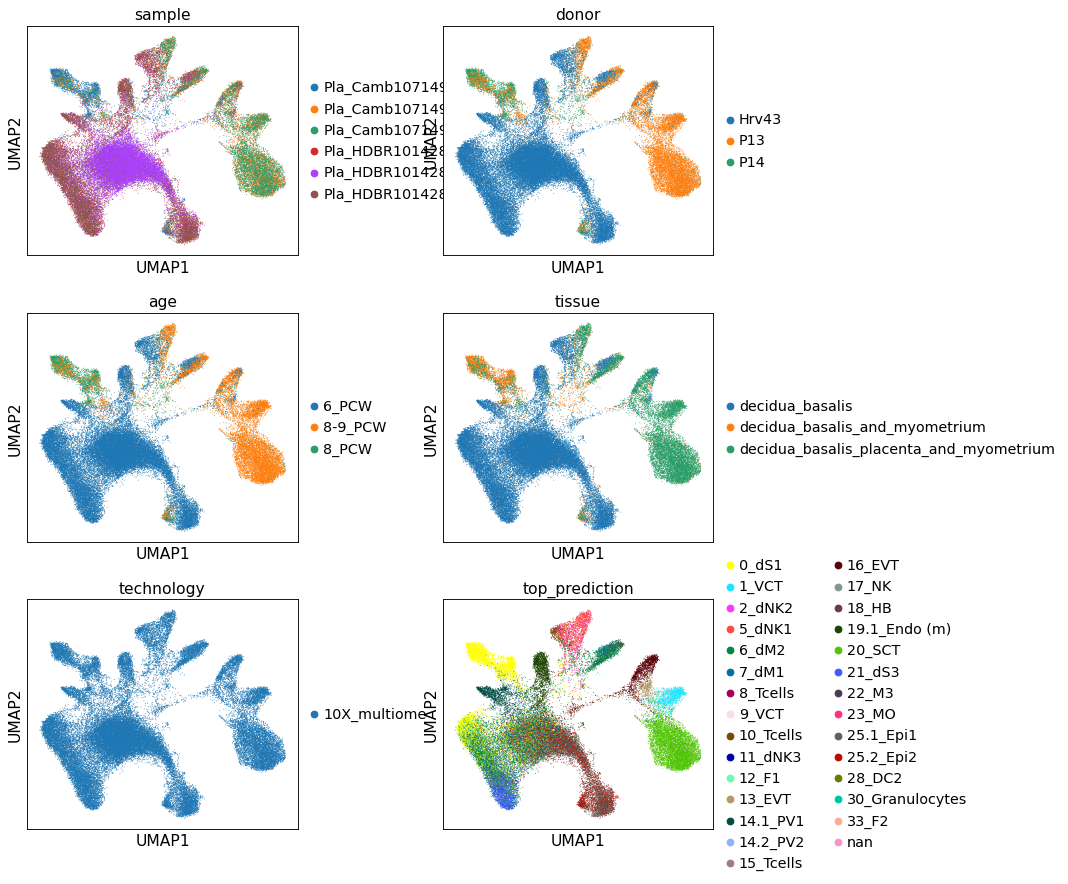

In [18]:
sc.pl.umap(gene_data, color = ['sample', 'donor', 'age', 'tissue', 'technology','top_prediction'], ncols = 2, wspace = 0.4, 
            #save = "_noharmony.pdf"
          )

In [21]:
# to better distinguish predictions from Vento-Tormo dataset
colors_VT = ['#C1B4A7','#E8D6E0','#40ab5d','#F7B5A4',
                 '#d8e7a4','#2ECCFA','#39728C','#FA5858','#E9A1C7',
                 '#B40486','#004529','#C49A6C','#9255a0', '#58595B', '#A3A8AD',
             
                 '#F6D8CE','#633A6D','#C7E0BD','#49ABC8', '#E7C949', 
             
             '#F7F297', '#af9e56',
                 '#ED1B64','#E59C24','#C2E8F6','#677EB2','#73FDD6', 
             '#BC3122', '#771A15',
                 '#E6C6F7','#CEE3F6','#CECEF6','#677EB2','#6363A5','#63A585',
                 '#246D66',
             '#9B8579']

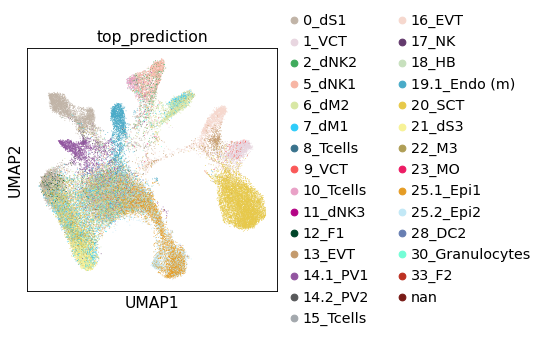

In [22]:
sc.pl.umap(gene_data, color = ['top_prediction'], ncols = 2, wspace = 0.4, 
            #save = "_noharmony.pdf",
           palette = colors_VT
          )

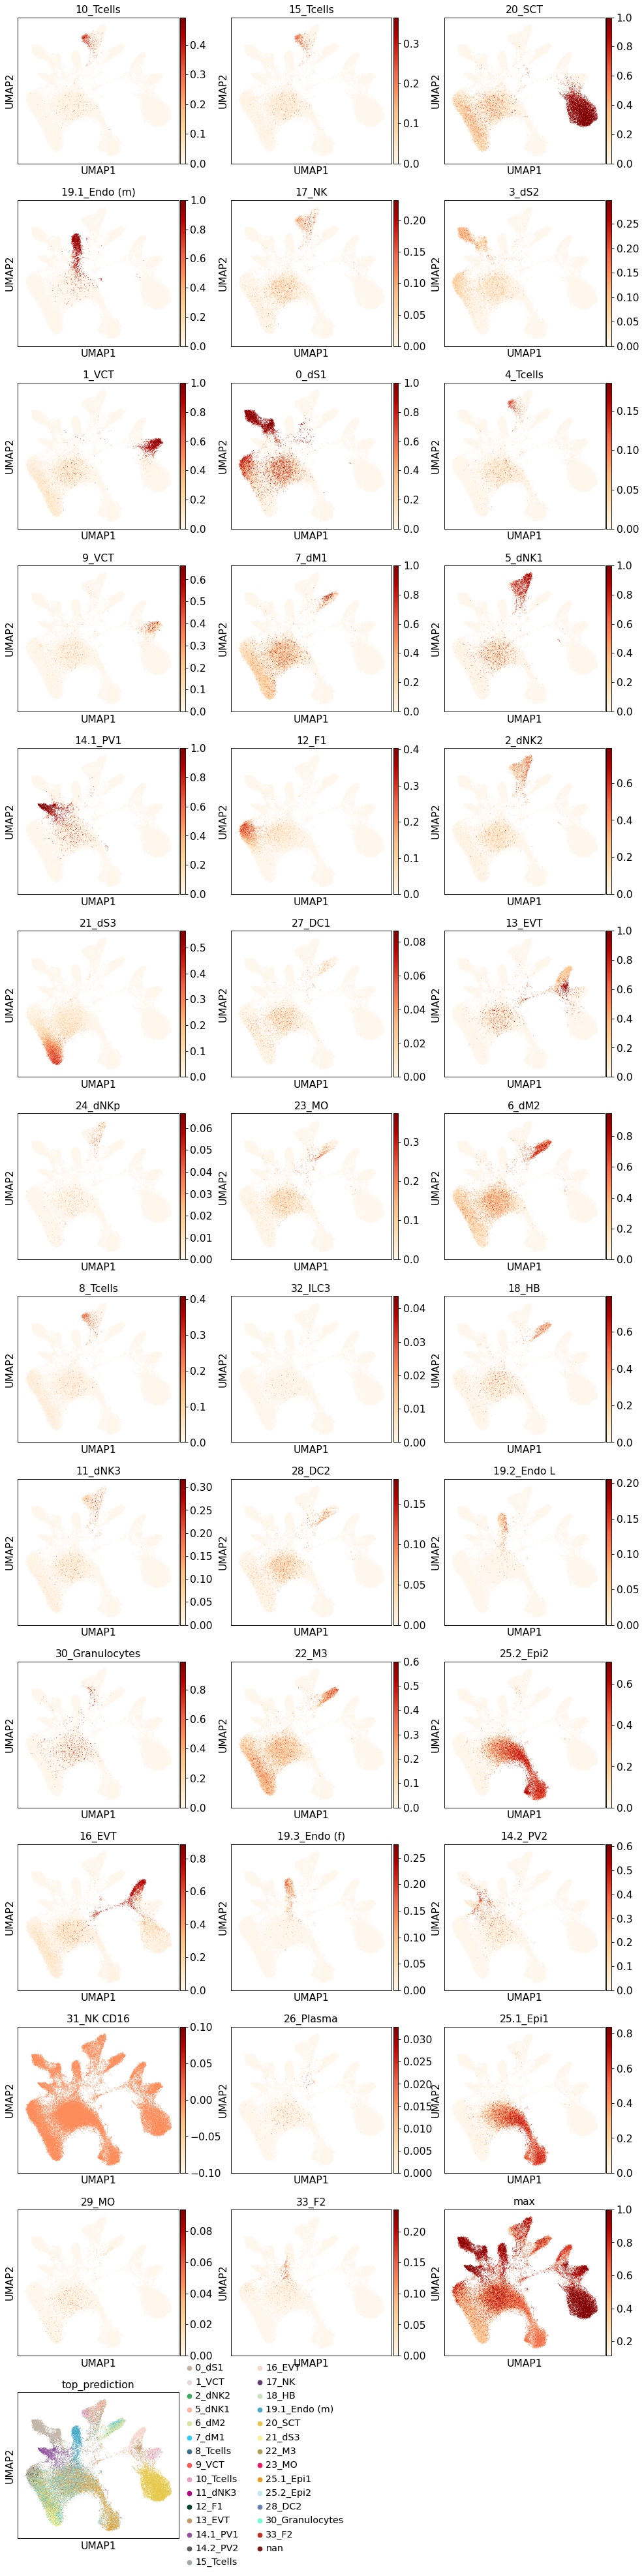

In [23]:
sc.pl.umap(gene_data, color = predicted_probabilities.columns, ncols = 3, color_map = 'OrRd', #save = "_probs_noharmony.pdf"
          )

In [24]:
predicted_probabilities.columns

Index(['10_Tcells', '15_Tcells', '20_SCT', '19.1_Endo (m)', '17_NK', '3_dS2',
       '1_VCT', '0_dS1', '4_Tcells', '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1',
       '12_F1', '2_dNK2', '21_dS3', '27_DC1', '13_EVT', '24_dNKp', '23_MO',
       '6_dM2', '8_Tcells', '32_ILC3', '18_HB', '11_dNK3', '28_DC2',
       '19.2_Endo L', '30_Granulocytes', '22_M3', '25.2_Epi2', '16_EVT',
       '19.3_Endo (f)', '14.2_PV2', '31_NK CD16', '26_Plasma', '25.1_Epi1',
       '29_MO', '33_F2', 'max', 'top_prediction'],
      dtype='object')

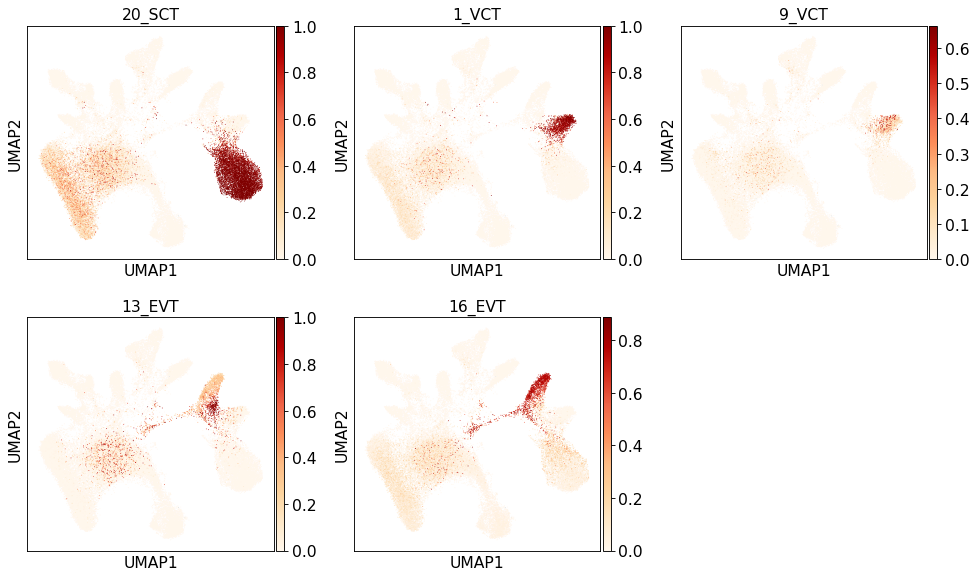

In [25]:
sc.pl.umap(gene_data, color = ['20_SCT','1_VCT','9_VCT','13_EVT','16_EVT'], ncols = 3, color_map = 'OrRd', #save = "_probs_noharmony.pdf"
          )

In [26]:
# resave the object with these scores 
gene_data.write(outdir + experiment_prefix + "_ATAC.geneScores.h5ad")

In [27]:
gene_data

AnnData object with n_obs × n_vars = 52798 × 8936
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology', '10_Tcells', '15_Tcells', '20_SCT', '19.1_Endo (m)', '17_NK', '3_dS2', '1_VCT', '0_dS1', '4_Tcells', '9_VCT', '7_dM1', '5_dNK1', '14.1_PV1', '12_F1', '2_dNK2', '21_dS3', '27_DC1', '13_EVT', '24_dNKp', '23_MO', '6_dM2', '8_Tcells', '32_ILC3', '18_HB', '11_dNK3', '28_DC2', '19.2_Endo L', '30_Granulocytes', '22_M3', '25.2_Epi2', '16_EVT', '19.3_Endo (f)', '14.2_PV2', '31_NK CD16', '26_Plasma', '25.1_Epi1', '29_MO', '33_F2', 'max', 'top_prediction'
    var: 'gene_id'
    uns: 'neighbors', 'umap', 'sample_colors', 'donor_colors', 'age_colors', 'tissue_colors', 'technology_colors', 'top_prediction_colors'
    obsm: 'X_cistopic_50', 'X_umap'
 

**Save the predicted annotations to the peaks anndata object for ATAC**

In [28]:
adata = sc.read_h5ad(outdir + experiment_prefix + "_ATAC.wCisTopic.h5ad")
adata

AnnData object with n_obs × n_vars = 52798 × 59281
    obs: 'cellatac_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'cellatac_code', 'sample', 'donor', 'age', 'tissue', 'technology'
    var: 'peak_width', 'exon', 'gene', 'promoter', 'annotation', 'gene_name', 'gene_id', 'tss_distance', 'ENCODE_blacklist', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'age_colors', 'cellatac_clusters_colors', 'donor_colors', 'neighbors', 'sample_colors', 'technology_colors', 'tissue_colors', 'umap'
    obsm: 'X_cistopic_50', 'X_umap'
    varm: 'peak2gene'
    layers: 'binary_raw'
    obsp: 'connectivities', 'distances'

In [29]:
for pred in predicted_probabilities.columns: 
    print(pred)
    adata.obs[pred] = predicted_probabilities[pred]

10_Tcells
15_Tcells
20_SCT
19.1_Endo (m)
17_NK
3_dS2
1_VCT
0_dS1
4_Tcells
9_VCT
7_dM1
5_dNK1
14.1_PV1
12_F1
2_dNK2
21_dS3
27_DC1
13_EVT
24_dNKp
23_MO
6_dM2
8_Tcells
32_ILC3
18_HB
11_dNK3
28_DC2
19.2_Endo L
30_Granulocytes
22_M3
25.2_Epi2
16_EVT
19.3_Endo (f)
14.2_PV2
31_NK CD16
26_Plasma
25.1_Epi1
29_MO
33_F2
max
top_prediction


In [30]:
adata.write(outdir + experiment_prefix + "_ATAC.wCisTopic.h5ad")

... storing 'top_prediction' as categorical


# batch effects in my data are not horrible, so for subsetting trophoblast I don't need to correct this object so far

#### End of notebook